# About Dataset
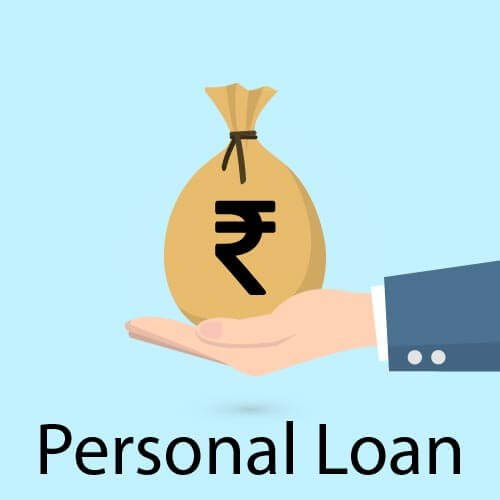

This dataset have 5000 row and 14 columns and personal Loan is target. other features are:
- ID : Customer ID
- Age : Customer's age in completed years
- Experience : Years of professional experience
- Income : Annual income of the customer (1000 dollars)
- Zip Code : Home Address ZIP code.
- Family : Family size of the customer (1,2,3,4)
- CCAvg : Avg. spending on credit cards per month (1000 dollars)
- Education : Education Level (1.Undergrad; 2.Graduate; 3.Advanced/ Professional)
- Mortgage : Value of house mortgage if any. (1000 dollars)
- Personal Loan : Did this customer accept the personal loan offered in the last campaign? (0,1)
- Securities_account : Does the customer have a securities account with the bank? (0,1)
- CD_account : Does the customer have a certificate of deposit (CD) account with the bank? (0,1)
- Online : Does the customer use internet banking facilities? (0,1)
- Creditcard : Does the customer use a credit card issued by Universal Bank?
(0,1)

An analysis explores factors that influence customers' ability to access a personal loan.

What are the factors that influence customers to accept personal loans?

# I/ OVERVIEW AND CLEAN DATA

## Import librares

In [1]:
#loading dataset
import pandas as pd
import numpy as np

In [2]:
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Zip Code
!pip install zipcodes
import zipcodes as zcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 kB 11.7 MB/s eta 0:00:00


## Load the dataset

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS_Virgil_M6_Final Project/Bank_Personal_Loan_Modelling.csv')#, index_col='ID')

In [5]:
df = data.copy()

## Overview dataset

In [6]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Remove unwanted data and rename columns

In [8]:
# drop ZIP Code columns
# df = df.drop(columns = {'ZIP Code'})
# df.rename(columns = {'ZIP Code':'ZIPCode','Personal Loan':'PersonalLoan','Securities Account':'SecuritiesAccount','CD Account':'CDAccount'}, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Convert ZIP Code add County column

In [10]:
# df['ZIP Code']= df['ZIP Code'].astype("str")

In [11]:
# def conver_zipcode(zipcode):
#   address = zcode.matching(zipcode)
#   if len(address)==1: # if zipcode is present then get county else, assign zipcode to county
#     return address[0].get('county')
#   else:
#     return zipcode

# df['County'] = df['ZIP Code'].apply(conver_zipcode)

In [12]:
# df['County'].replace(to_replace = {'92717':'Irvine County','96651':'Laguna Beach County','92634':'Fullerton County','9307':'Merced County'}, inplace=True)

In [13]:
# df['County']=df['County'].str.split('\s+').str[:-1].apply(lambda parts: " ".join(parts))

In [14]:
# df['County'].value_counts()

## Check duplicated data

In [15]:
df.duplicated().sum()

0

there is not duplicated in data

## Check for missing values

In [16]:
df.isnull().sum().to_frame().T

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Check and change datatype

In [17]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [18]:
# df['Experience'].describe()
# df['Experience'].value_counts()
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

It has a negative value in the Experience column, we convert to a positive value.

In [19]:
df['Experience'] = df['Experience'].abs()

# II/ Descriptive Statistics and Correlation Analysis Data

In [ ]:
# Descriptive Statistics
statistics = df.describe().T
print("Descriptive Statistics:")
statistics

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Summary describes:
- Age, Experience, Income, CCAvg, Mortgage are numerical variables.
- Personal loan, Securities Account, CD Account, Online, Credit Card are categorical variables.
- Customer age ranges from 23 to 67; average age is 45; maximum customer experience is 43 years.
- Custmer income from 8000 to 98000 per year, family size from 1 to 4 members


In [ ]:
# Correlation Analysis
correlation_matrix = df.corr()
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


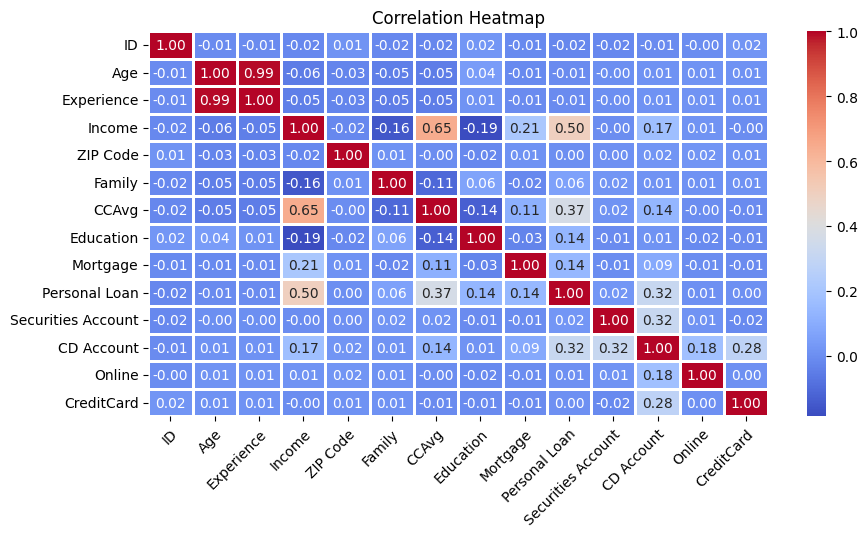

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data = correlation_matrix, cmap = 'coolwarm', annot = True, fmt=".2f", linewidths=1, linecolor='white')
plt.xticks(rotation=45, ha="right",rotation_mode="anchor")
plt.title('Correlation Heatmap')
plt.show()

- Age and Experience are highly correlated and the correlation;
- Income and CCAvg is moderately correlated;
-Personal Loan has maximum correlation with Income, CCAvg, CD Account, Mortgage,and Education

In [ ]:
plt.figure(figsize = (15,8))
sns.pairplot(df, x_vars=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], y_vars =['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], hue = 'Personal Loan')
plt.show()

# III/ Exploratory Data Analysis (EDA)

An analysis explores factors that influence customers' ability to access a personal loan.

### 1/Distribution of Personal Loan

In [ ]:
# Data Distribution
loan_counts = df['Personal Loan'].value_counts()
loan_rate = df['Personal Loan'].sum() / df['Personal Loan'].count() * 100
print(f"Loan Distribution:\n{loan_counts}")
print(f"Percentage of personal loan acceptance:{loan_rate :.2f}%")

Loan Distribution:
0    4520
1     480
Name: Personal Loan, dtype: int64
Percentage of personal loan acceptance:9.60%


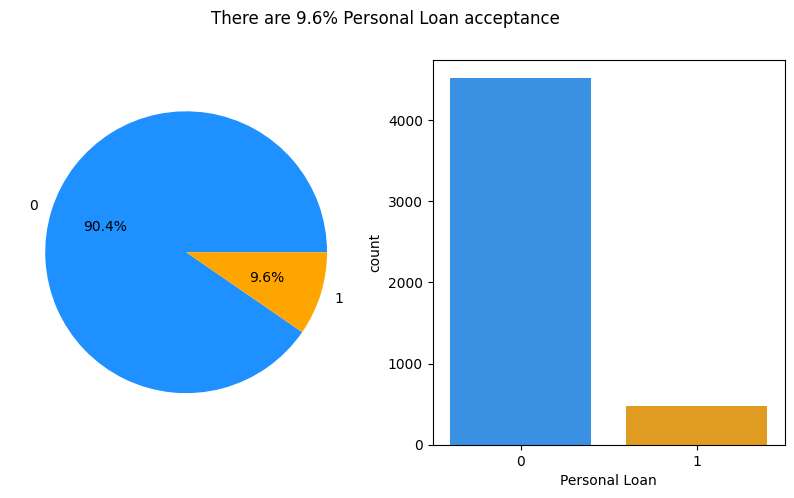

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle(f'There are {loan_rate:.1f}% Personal Loan acceptance')
plt.subplot(121)
plt.pie(df['Personal Loan'].value_counts(), labels = df['Personal Loan'].unique(),colors = sns.color_palette(['dodgerblue','orange']), autopct='%.1f%%')

plt.subplot(122)
sns.countplot(data = df, x= 'Personal Loan', palette =['dodgerblue','orange'])
plt.show()

In [ ]:
personal_loan = df.groupby('Personal Loan').mean()
personal_loan

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.165487,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


- People with personal loans earn more than twice as much as those without personal loans.
- Average spending on credit card bills is higher for personal loan takers.
- The mortgage value is also double that of people who took personal loans.

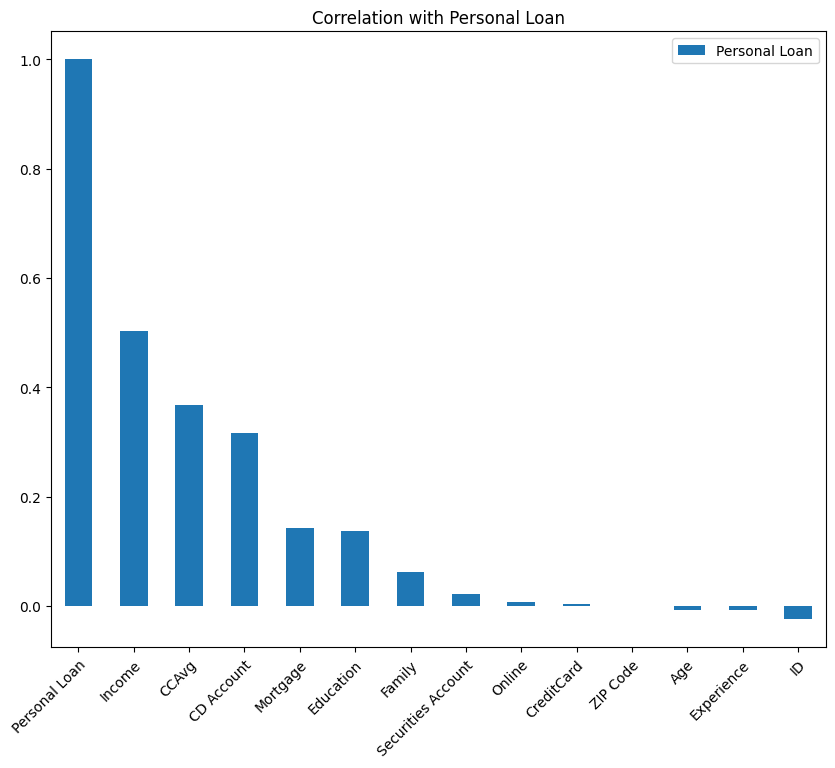

In [ ]:
# Correlation Analysis
correlation = df.corr()['Personal Loan'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
correlation.plot(kind ='bar', stacked=True, title ="Correlation with Personal Loan")
plt.legend(loc = 'best',bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=45, ha="right",rotation_mode="anchor")
plt.show()

### 2/ Visualize the distribution of Age, Experience, Income, Family size, Average spending on credit cards per month and Mortgage.

In [ ]:
# # 1. Calculate the quantiles
# q1 = df["Age"].quantile(0.25)  # Tính Q1
# q3 = df["Age"].quantile(0.75)  # Tính Q3

# # 2. Calculate the interquantile range
# iqr = q3 - q1
# iqr

# # # 3. Calculate the whisker
# upper = q3 + 1.5 * iqr
# lower = q1 - 1.5 * iqr
# print(upper)
# print(lower)

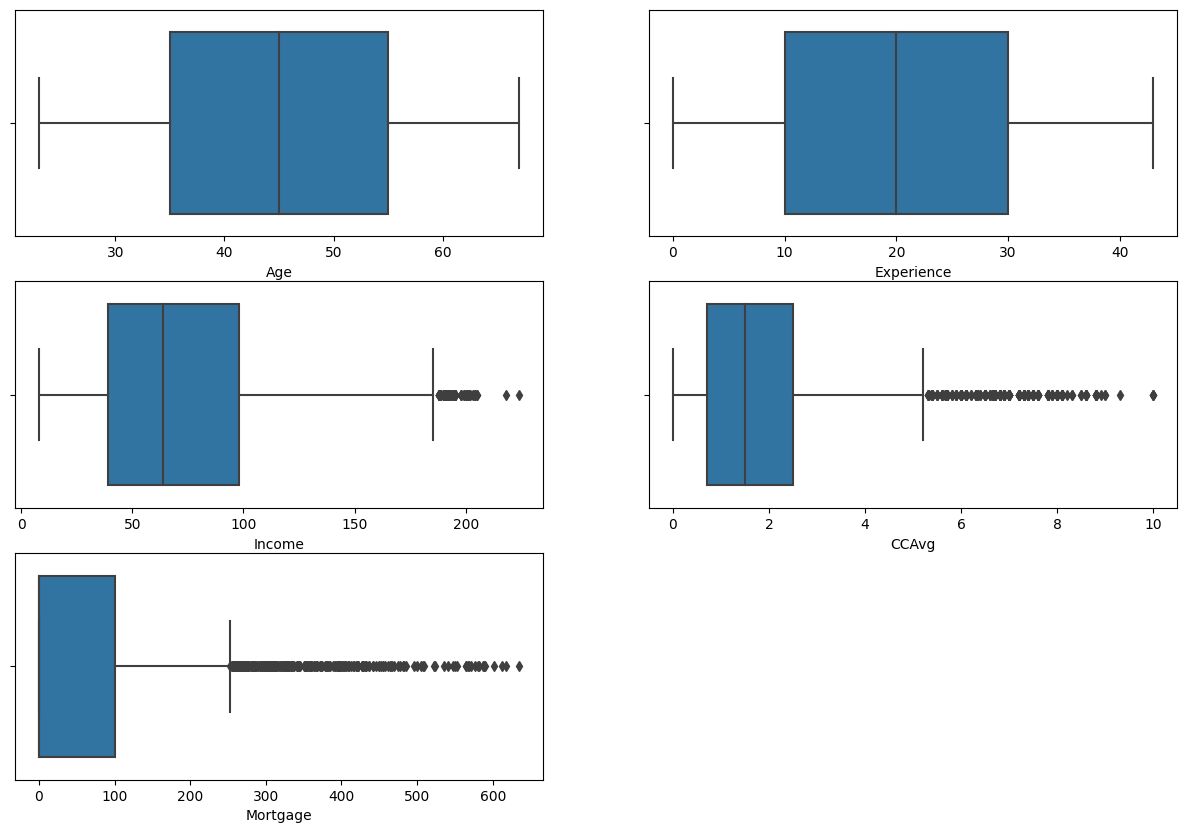

In [ ]:
numeric_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

plt.figure(figsize=(15,10))
# plt.suptitle('Visualize the distribution')
for i,col in enumerate(numeric_columns):
  plt.subplot(3,2,i+1)
  sns.boxplot(data = df, x=col)
plt.show()

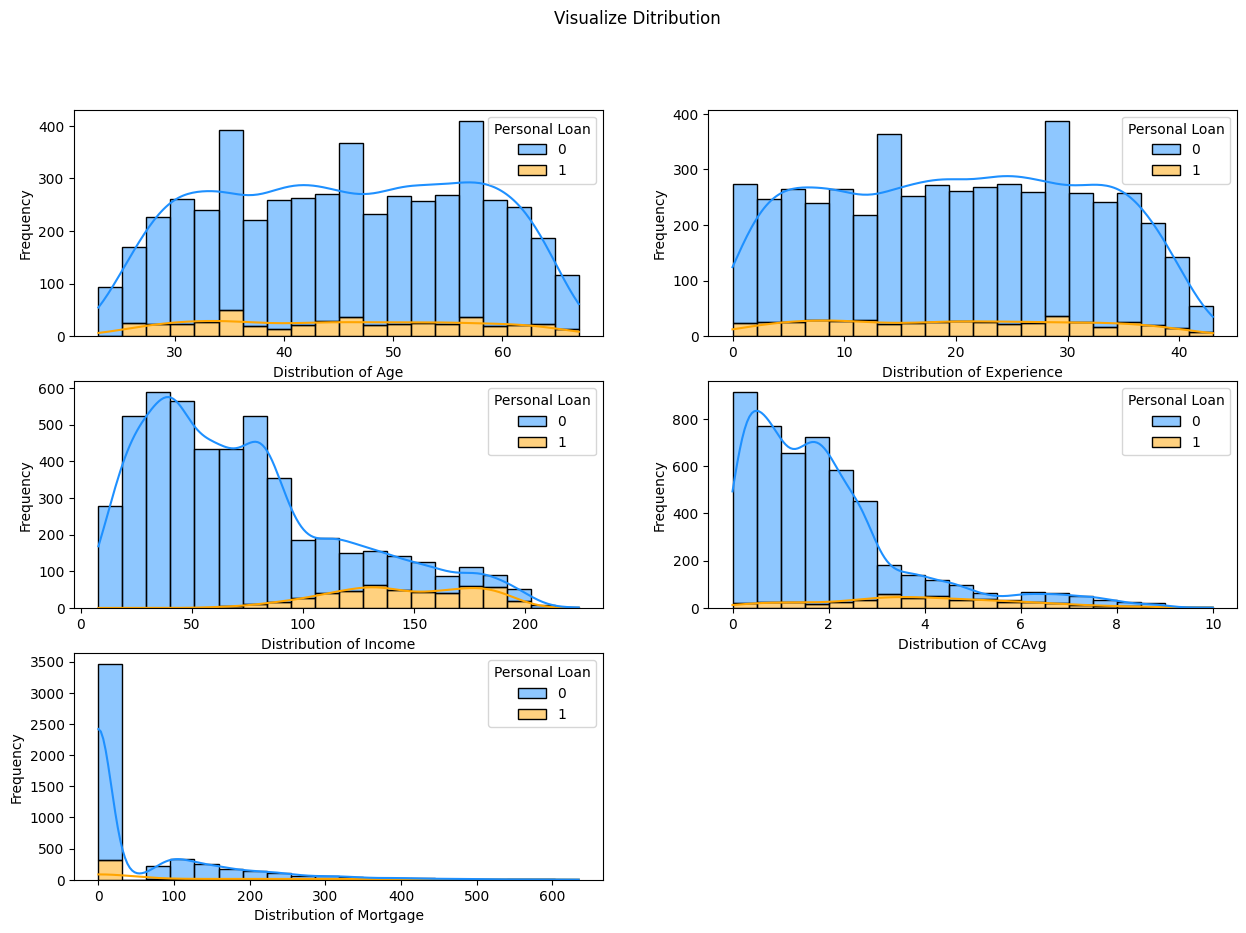

In [ ]:
# Data Distribution
numeric_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

plt.figure(figsize=(15,10))
plt.suptitle('Visualize Ditribution')

for i,col in enumerate(numeric_columns):
  plt.subplot(3,2,i+1)
  sns.histplot(data = df, x= col, bins=20, hue= 'Personal Loan', multiple = 'stack', kde = True, palette =['dodgerblue','orange'])
  plt.xlabel(f'Distribution of {col}')
  plt.ylabel('Frequency')
  # plt.title(f'Distribution of {col}')

plt.show()

- Age and Experience have normal distributions, does not affect personal loans acceptance.
- Customers with High Income have more chances of having Personal Loan.
- The customer who took the personal loan has a low CCAvg.
- The Mortgage have more chances of customer having Personal Loan.

### 3/ Categorical Analysis: Education, Securities Account, CD Account, Online, CreditCard.

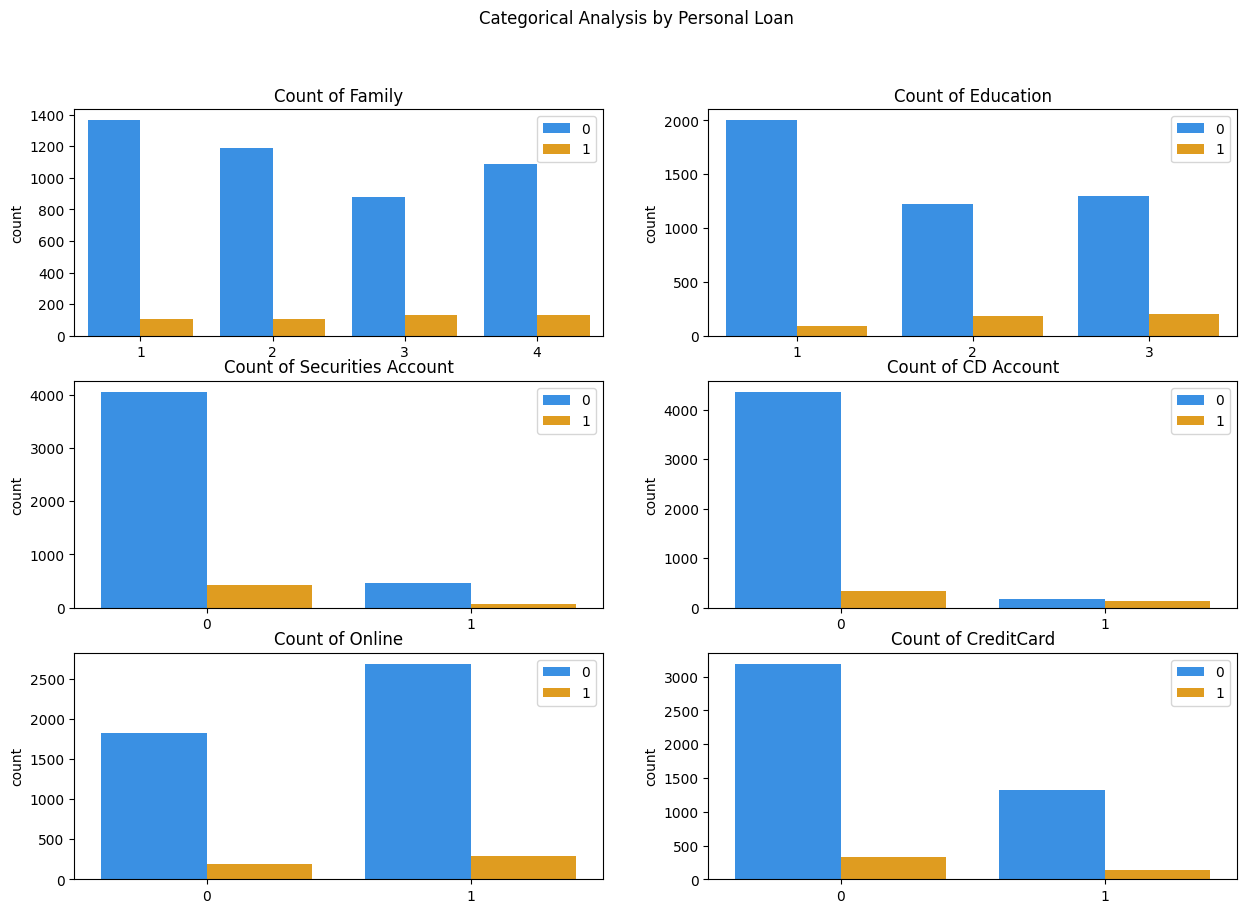

In [20]:
categorical_columns = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
plt.figure(figsize=(15,10))
plt.suptitle('Categorical Analysis by Personal Loan')
for i, column in enumerate(categorical_columns):
    plt.subplot(3,2,i+1)
    sns.countplot(data=df, x=column, hue= 'Personal Loan', palette =['dodgerblue','orange'])
    plt.title(f'Count of {column}')
    plt.xlabel(None)
    plt.legend(loc = 'best')
plt.show()

- Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan;
- Customers with higher education tend to borrow personal loan.

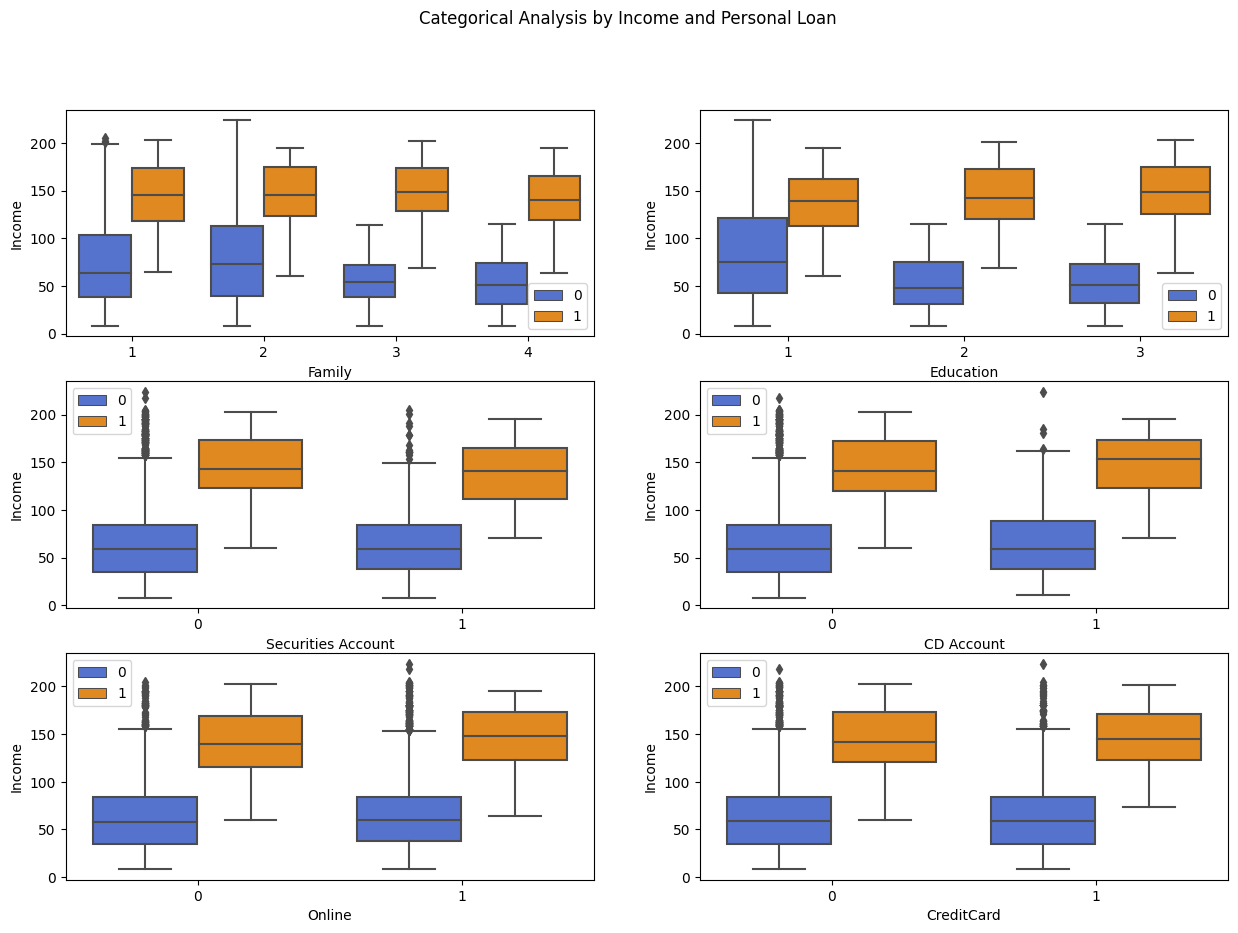

In [ ]:
categorical_columns = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

plt.figure(figsize=(15,10))
plt.suptitle('Categorical Analysis by Income and Personal Loan')

for i,col in enumerate(categorical_columns):
  plt.subplot(3,2,i+1)
  sns.boxplot(data = df, x=col, y='Income', hue = 'Personal Loan',palette =['royalblue','darkorange'])
  # plt.xlabel()
  plt.legend(loc = 'best')
plt.show()

## 4/ Education level and family size affect personal loan acceptance

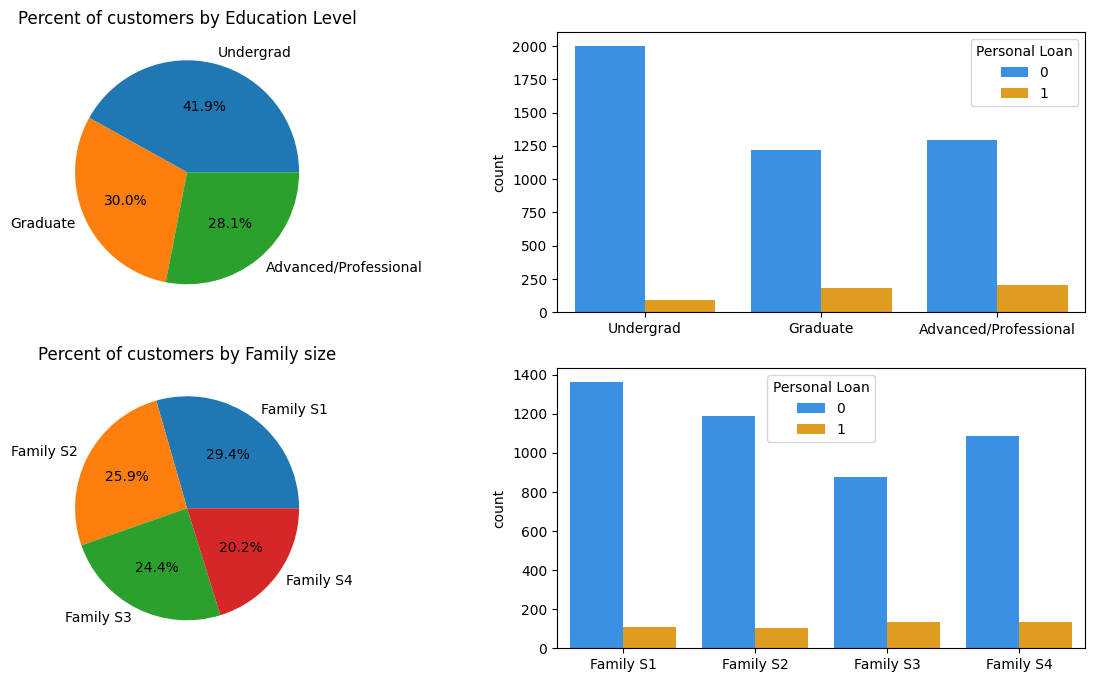

In [ ]:
plt.figure(figsize = (15,8))
plt.subplot(221)
plt.title('Percent of customers by Education Level')
plt.pie(df['Education'].value_counts(), labels= ['Undergrad', 'Graduate', 'Advanced/Professional'],autopct = '%0.1f%%')

plt.subplot(222)
sns.countplot(df, x= 'Education', hue= 'Personal Loan', palette =['dodgerblue','orange'])
plt.xticks(ticks=[0,1, 2], labels=['Undergrad', 'Graduate', 'Advanced/Professional'])
plt.xlabel(None)
plt.xticks(rotation=0, ha="center",rotation_mode="anchor")

plt.subplot(223)
plt.title('Percent of customers by Family size')
plt.pie(df['Family'].value_counts(), labels= ["Family S1", "Family S2", "Family S3","Family S4"],autopct = '%0.1f%%')

plt.subplot(224)
sns.countplot(df, x= 'Family', hue= 'Personal Loan', palette =['dodgerblue','orange'])
plt.xticks(ticks=[0,1, 2,3], labels=["Family S1", "Family S2", "Family S3","Family S4"])
plt.xlabel(None)
plt.xticks(rotation=0, ha="center",rotation_mode="anchor")
plt.show()

## 5/ Level of income and age group affect personal loan acceptance

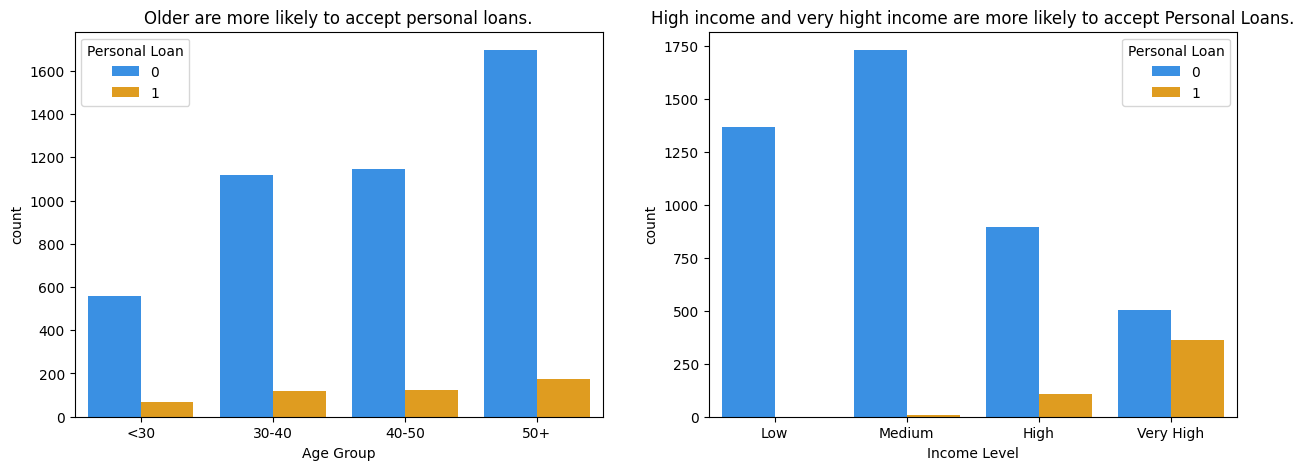

In [ ]:
age_bins = [0, 30, 40, 50, np.inf]
age_labels = ['<30', '30-40', '40-50', '50+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
income_bins = [8, 40, 80, 120, np.inf]
income_labels = ['Low', 'Medium', 'High', 'Very High']
df['Income Level'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.title('Older are more likely to accept personal loans.')
sns.countplot(df, x= 'Age Group', hue= 'Personal Loan', palette =['dodgerblue','orange'])

plt.subplot(122)
plt.title('High income levels are more likely to accept Personal Loans.')
sns.countplot(df, x= 'Income Level', hue= 'Personal Loan', palette =['dodgerblue','orange'])
plt.show()

## 6/Correlation Analysis: Income and CCAvg to Personal Loan acceptance

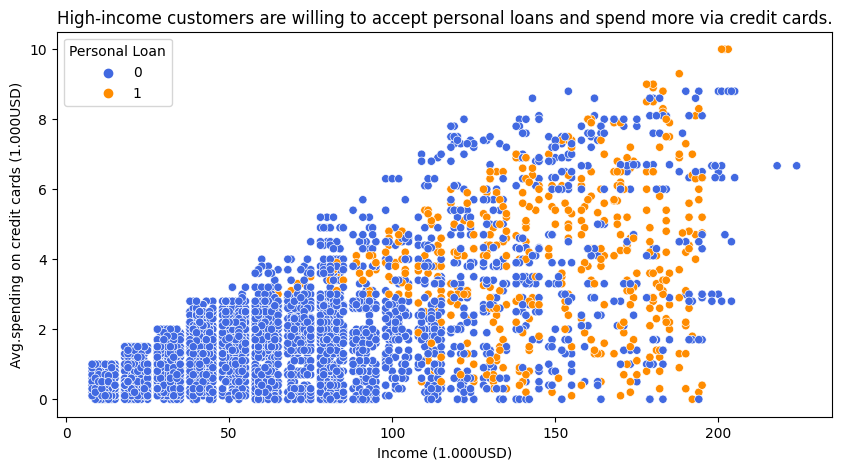

In [ ]:
plt.figure(figsize=(10,5))
plt.title('High-income customers are willing to accept personal loans and spend more via credit cards.')
sns.scatterplot(x='Income', y='CCAvg', data=df, hue = 'Personal Loan', palette =['royalblue','darkorange'])
plt.xlabel('Income (1.000USD)')
plt.ylabel('Avg.spending on credit cards (1.000USD)')
plt.show()

## 7/Personal Loans by County

In [ ]:
df['ZIP Code']= df['ZIP Code'].astype("str")

In [ ]:
def conver_zipcode(zipcode):
  address = zcode.matching(zipcode)
  if len(address)==1: # if zipcode is present then get county else, assign zipcode to county
    return address[0].get('county')
  else:
    return zipcode

df['County'] = df['ZIP Code'].apply(conver_zipcode)

In [ ]:
df['County'].replace(to_replace = {'92717':'Irvine County','96651':'Laguna Beach County','92634':'Fullerton County','9307':'Merced County'}, inplace=True)

In [ ]:
df['County'].value_counts()

Los Angeles        1095
San Diego           568
Santa Clara         563
Alameda             500
Orange              339
San Francisco       257
San Mateo           204
Sacramento          184
Santa Barbara       154
Yolo                130
Monterey            128
Ventura             114
San Bernardino      101
Contra Costa         85
Santa Cruz           68
Riverside            56
Kern                 54
Marin                54
Solano               33
San Luis Obispo      33
Humboldt             32
Sonoma               28
Fresno               26
Placer               24
Irvine               22
Butte                19
Shasta               18
El Dorado            17
Stanislaus           15
San Benito           14
San Joaquin          13
Mendocino             8
Siskiyou              7
Tuolumne              7
Laguna Beach          6
Fullerton             5
Merced                5
Trinity               4
Lake                  4
Imperial              3
Napa                  3
Name: County, dt

In [ ]:
df['County']=df['County'].str.split('\s+').str[:-1].apply(lambda parts: " ".join(parts))

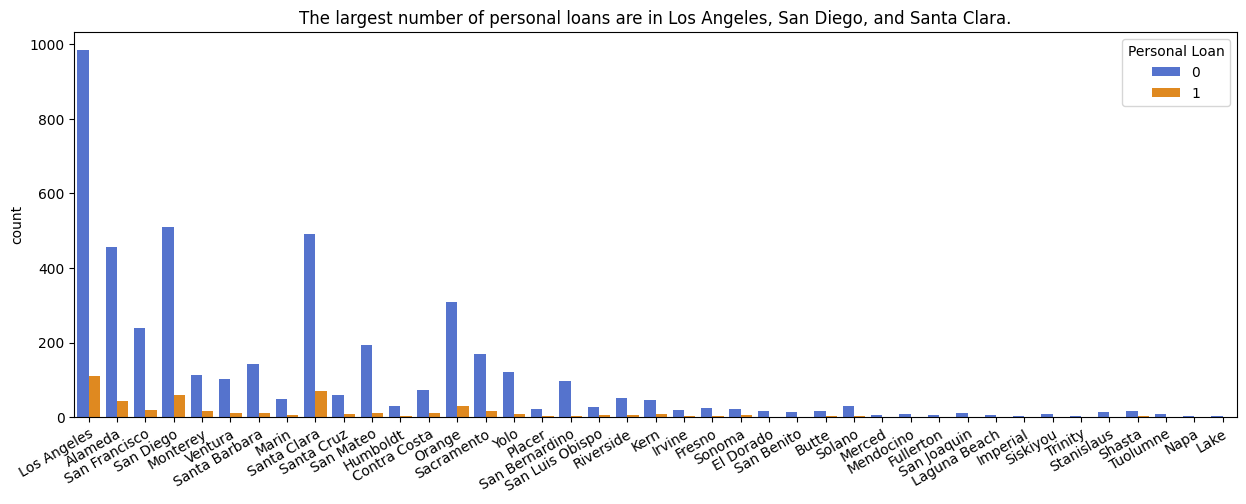

In [ ]:
plt.figure(figsize = (15,5))
plt.title('The largest number of personal loans are in Los Angeles, San Diego, and Santa Clara.')
sns.countplot(data = df, x = 'County',hue ='Personal Loan', palette =['royalblue','darkorange'])
plt.xlabel(None)
plt.xticks(rotation=30, ha="right",rotation_mode="anchor")
plt.show()

- The largest number of customers were from Los Angeles, followed by San Diego and Santa Clara
- The largest number of customers who took Personal Loan were from Los Angeles,San Diego and Santa Clara.

# IV/ Feature Importance

In [ ]:
df2 = data.copy()

In [ ]:
# Feature Importance (using Random Forest)
from sklearn.ensemble import RandomForestClassifier

X = df2.drop('Personal Loan', axis=1)
y = df2['Personal Loan']

rf = RandomForestClassifier()
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:")
# print(feature_importances)
feature_importances

Feature Importance:


Income                0.313873
Education             0.197240
CCAvg                 0.169918
Family                0.113325
CD Account            0.055681
ZIP Code              0.033790
Age                   0.033562
Experience            0.032163
Mortgage              0.031543
CreditCard            0.008480
Online                0.006417
Securities Account    0.004008
dtype: float64

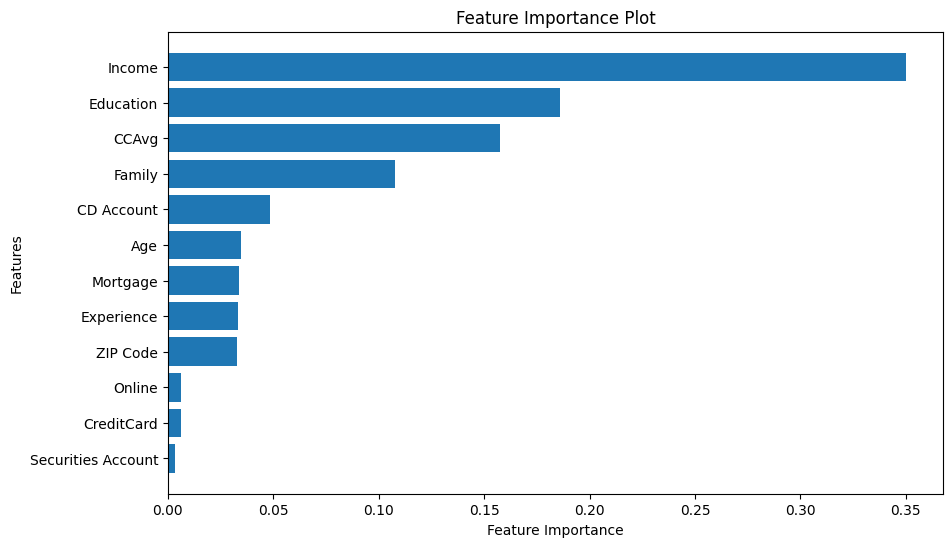

In [ ]:
sorted_indices = feature_importances.abs().sort_values(ascending=True).index
sorted_importance = feature_importances[sorted_indices]

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_indices, sorted_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

Note:Income, Education, CCAvg, Family size, had CD Account is important features for personal loan acceptance.

# V/ Build model to predict personal loan accept

## Get data

In [ ]:
df_m = data.copy()

## Import scikit learn libraries

In [ ]:
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import auc, roc_curve

## Select feature and target variable

In [ ]:
# Split the dataset into features (X) and target (y)
X = df_m.drop(['Personal Loan'], axis=1)
y = df_m['Personal Loan']

##  Split the dataset

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)

## Build and train different classification models

In [ ]:
# Create the model with class weights
models = {
    'Logistic Regression': LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]}),
    'Decision Tree': DecisionTreeClassifier(class_weight={0: class_weights[0], 1: class_weights[1]}),
    'Random Forest': RandomForestClassifier(class_weight={0: class_weights[0], 1: class_weights[1]})
}

# Create the model
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier()
# }

model_accuracies = {}
model_auc = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

    fpr, tpr, thres = metrics.roc_curve(y_test, y_pred)
    model_auc[name] = auc(fpr, tpr)

    print(f"{name} Accuracy: {accuracy:.2f}")
    print('-'*50)

    fpr, tpr, thres = metrics.roc_curve(y_test, y_pred)
    print(f"{name} AUC:{auc(fpr, tpr):.2f}")
    print('-'*50)

    classification_report_output = classification_report(y_test, y_pred)
    print(f"{name} Classification Report:\n{classification_report_output}")
    print('-'*50)

    confusion_matrix_output = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:\n{confusion_matrix_output}\n")
    print('='*50)

Logistic Regression Accuracy: 0.90
--------------------------------------------------
Logistic Regression AUC:0.91
--------------------------------------------------
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       895
           1       0.50      0.92      0.65       105

    accuracy                           0.90      1000
   macro avg       0.75      0.91      0.79      1000
weighted avg       0.94      0.90      0.91      1000

--------------------------------------------------
Logistic Regression Confusion Matrix:
[[798  97]
 [  8  97]]

Decision Tree Accuracy: 0.98
--------------------------------------------------
Decision Tree AUC:0.95
--------------------------------------------------
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.92      0.90      0.91       1

## Evaluate performance

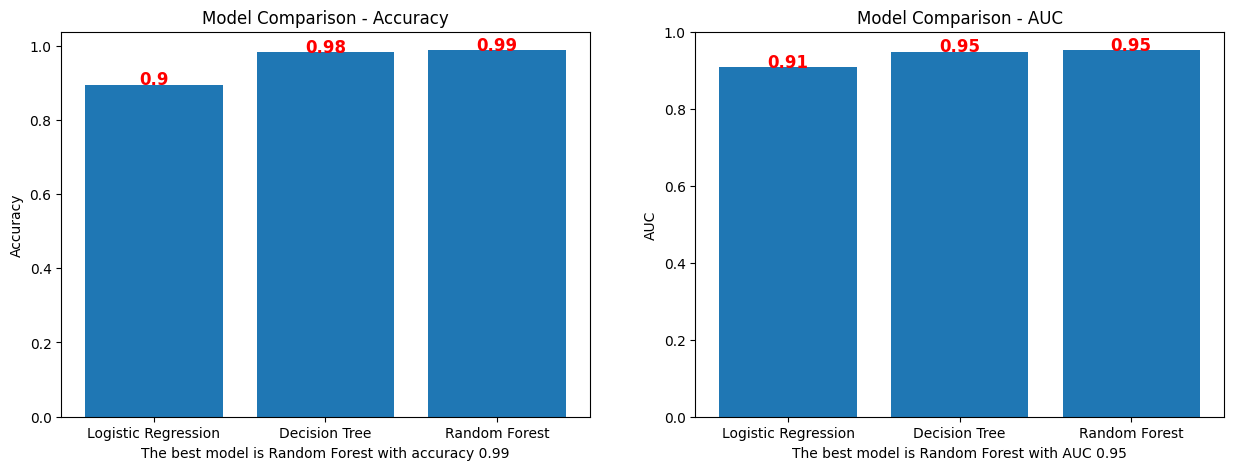

In [ ]:
best_model = max(model_accuracies, key=model_accuracies.get)
best_model1 = max(model_auc, key=model_auc.get)
# Plotting model accuracies
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.bar(model_accuracies.keys(), model_accuracies.values())
for i in model_accuracies:
    plt.text(
                x=i,
                y=model_accuracies[i],
                s= round(model_accuracies[i],2),
                ha="center",
                fontsize="large",
                fontweight="bold",
                color="red",
            )
plt.xlabel(f"The best model is {best_model} with accuracy {model_accuracies[best_model]:.2f}")
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')

plt.subplot(122)
plt.bar(model_auc.keys(), model_auc.values())
for i in model_auc:
    plt.text(
                x=i,
                y=model_auc[i],
                s= round(model_auc[i],2),
                ha="center",
                fontsize="large",
                fontweight="bold",
                color="red",
            )
plt.xlabel(f"The best model is {best_model1} with AUC {model_auc[best_model1]:.2f}")
plt.ylabel('AUC')
plt.title('Model Comparison - AUC')
plt.ylim([0, 1])
plt.show()

In [ ]:
# Find the model with the highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
best_model1 = max(model_auc, key=model_auc.get)
print(f"The best model is: {best_model} with accuracy {model_accuracies[best_model]:.2f}")
print(f"The best model is: {best_model1} with AUC {model_auc[best_model1]:.2f}")

The best model is: Random Forest with accuracy 0.99
The best model is: Random Forest with AUC 0.95


Biểu diễn đường cong ROC:

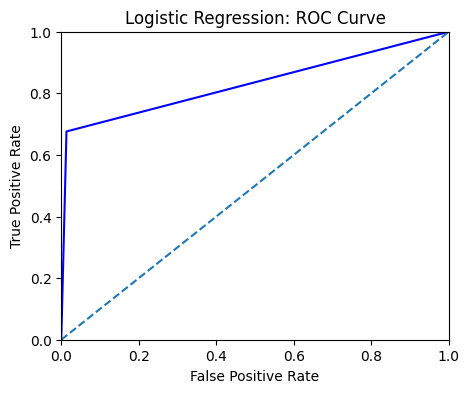

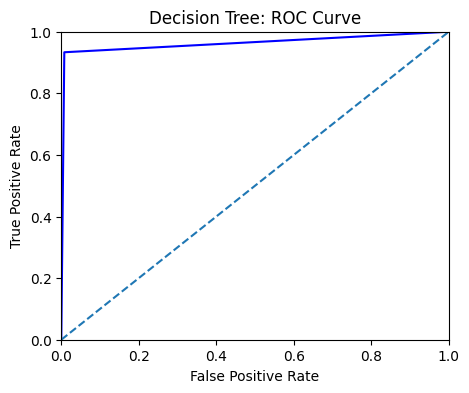

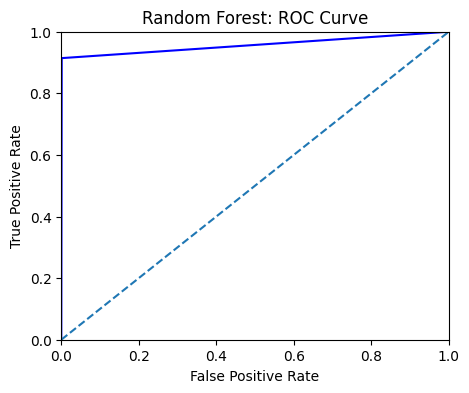

In [ ]:
def _plot_roc_curve(fpr, tpr, thres):
    roc = plt.figure(figsize = (5, 4))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name}: ROC Curve')

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    fpr, tpr, thres = metrics.roc_curve(y_test, y_pred)
    _plot_roc_curve(fpr, tpr, thres)

# IV/ Export to Google Sheet Report and Design a Tableau Dashboard

In [ ]:
# prepare data
df_exp = data.copy()

In [ ]:
# df_exp.info()
df_exp[['Education','Family','Personal Loan','Securities Account','CD Account','Online','CreditCard']] = df_exp[['Education','Family','Personal Loan','Securities Account','CD Account','Online','CreditCard']].astype(str)

In [ ]:
# Connect to Google Sheets
!pip install --upgrade oauth2client gspread

In [ ]:
!pip uninstall gspread-dataframe
# Successfully uninstalled gspread-dataframe-3.0.8

!pip install gspread-dataframe
# Successfully installed gspread-dataframe-3.2.2

In [ ]:
# Mount to Google Sheets
from google.colab import auth

auth.authenticate_user()

# Import neccessary libraries
import gspread
from gspread_dataframe import set_with_dataframe

from google.auth import default
creds, _ = default()

In [ ]:
# Authorize Google Sheets API
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)

Create new spreadsheet, this step is only ran in the first time exporting data to gsheet.

In [ ]:
# Create a new Google Spreadsheets
sh = gc.create("Personal Loan banking") # Thay bằng tên spreadsheet của các bạn

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age Group,Income Level,County
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,<30,Medium,Los Angeles
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,40-50,Low,Los Angeles
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,30-40,Low,Alameda
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,30-40,High,San Francisco
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,30-40,Medium,Los Angeles


In [ ]:
df_exp.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


After this step, go to https://docs.google.com/spreadsheets to find your sheet and get the link of it.

 https://docs.google.com/spreadsheets/d/12cS-MnUxV9lfKOrhqQlR1g3RRcpDF9XlOhm4xHIa-ic/edit#gid=0

key : 12cS-MnUxV9lfKOrhqQlR1g3RRcpDF9XlOhm4xHIa-ic

In [ ]:
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                   Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
       worksheet_id (int): 0, 1, 2, ...
       data (DataFrame): data to write
    """
    sh = gc.open_by_key(gsheet_key)

    # To create a new worksheet with 1000 rows and 26 columns
    worksheet = sh.add_worksheet(worksheet_name, 1000, 26)

    # For writing to an existing worksheet
    # worksheet = sh.get_worksheet(0) # --> to get the first worksheet

    # Worksheet(worksheet, data)
    set_with_dataframe(worksheet, data)

In [ ]:
# Notice! Replace the key by your google sheet key
# Notice! Worksheet has to have unique name

export_data_to_new_sheet('1GyCUQRrKw-GrpWfK27e3F9zH-2cjyiX0LS1zXs6CCFU','Personal Loan banking_add', df)
# export_data_to_new_sheet('1GyCUQRrKw-GrpWfK27e3F9zH-2cjyiX0LS1zXs6CCFU','Personal Loan banking', df_exp)